<a href="https://colab.research.google.com/github/MathsGb/Zeros-de-funcoes-reais-UABJ/blob/main/C%C3%A1lculo_de_PVI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

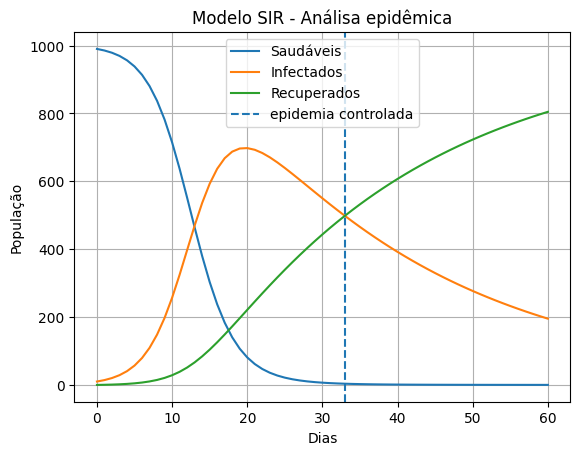

Pico de epidemia: 20
Quantide de pessoas infectadas no pico: 697.7933462385398
A epidemi é considerada controlada a partir do dia: 33


In [4]:
import numpy as np
import matplotlib.pyplot as plt

b = 0.4  # Coeficiente de transmissão
y = 0.035
total = 1000  # População total

# Condições iniciais
S0 = 990
I0 = 10
R0 = 0
Dias_totais = 60 #foi solicitados avaliar em 60 dias
passo = 1  # Passo de tempo

# Funções para S I e R
def defS(S, I):
    return -(b / total) * S * I

def defI(S, I):
    return (b / total) * S * I - y * I

def defR(I):
    return y * I

# Método Euler modificado
def Metodo_Rungekutta(S, I, R):
    S1 = defS(S, I)
    I1 = defI(S, I)
    R1 = defR(I)

    S2 = defS(S+ (passo * S1), I + (passo * I1))
    I2 = defI(S+ (passo * S1), I + (passo * I1))
    R2 = defR(I+ (passo * I1))

    res_S = S + (passo / 2) * (S1 + S2)
    res_I = I + (passo / 2) * (I1 + I2)
    res_R = R + (passo / 2) * (R1 + R2)
    return res_S, res_I, res_R

# Quantidade de dias para analize, intervalo
Dias_totais = 60
passo = 1  # Passo de tempo

S_array = np.zeros(61)  # 61 pois a quantidade de pontos é dada pela quantia de intervalos + 1
S_array[0] = S0 # adicionando o caso inicial

I_array = np.zeros(61)
I_array[0] = I0

R_array = np.zeros(61)
R_array[0] = R0

for i in range(60):
    S_array[i+1], I_array[i+1], R_array[i+1] = Metodo_Rungekutta(S_array[i], I_array[i], R_array[i])

# Encontrando o pico da epidemia
Pico = np.argmax(I_array)

# numero maximo de infectados dentres os 1000
Infecções_max = I_array[Pico]

for i in range(61): #Descobrindo o dia de controle Recuperados >= infectados
    if R_array[i] >= I_array[i]:
        epidemia_controlada = i
        break

tempo = np.arange(0, Dias_totais + passo, passo)

# Criando o gráfico
plt.plot(tempo, S_array, label='Saudáveis')
plt.plot(tempo, I_array, label='Infectados')
plt.plot(tempo, R_array, label='Recuperados')
plt.axvline(x=epidemia_controlada, linestyle='--', label= 'epidemia controlada')
plt.xlabel('Dias')
plt.ylabel('População')
plt.title('Modelo SIR - Análisa epidêmica')
plt.legend()
plt.grid()

plt.show()

# Imprimindo informações
print(f'Pico de epidemia: {Pico}')
print(f'Quantide de pessoas infectadas no pico: {Infecções_max}')
print(f'A epidemi é considerada controlada a partir do dia: {epidemia_controlada}')